/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


===== Signal Analysis =====
Peak Frequency: 50.00 Hz
Total Signal Energy: 0.7218
Noise Estimate (std dev): 0.6008
Selected Mode: Classical NN (Lab Mode)


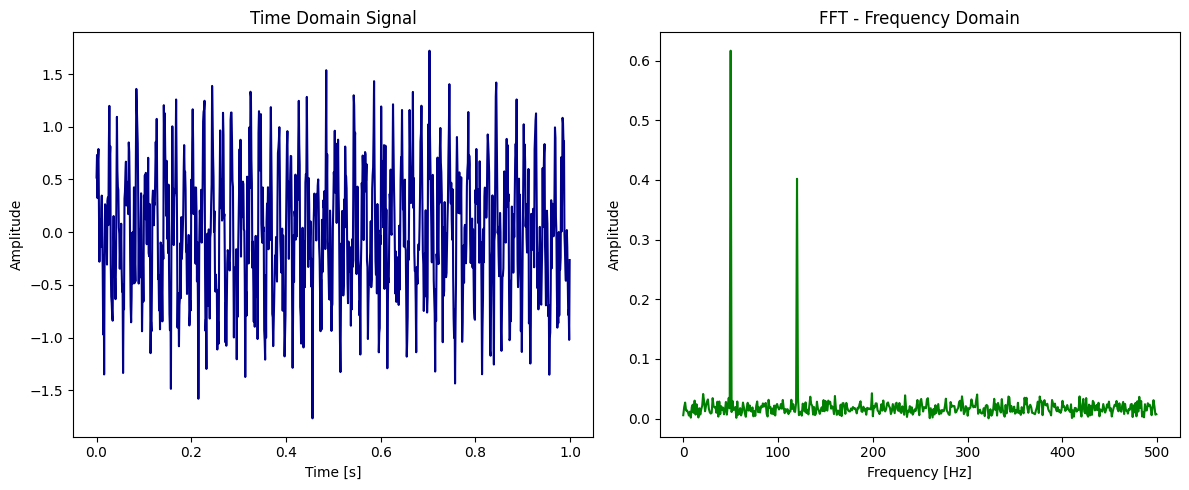

In [1]:
# Hybrid NN + QFT Signal Processing Demo (Colab-Compatible)
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# STEP 1: Simulate sample signal (e.g., from open air communication)
fs = 1000        # Sampling frequency (Hz)
T = 1.0          # Duration (seconds)
t = np.linspace(0.0, T, int(fs*T), endpoint=False)

# Composite signal: two frequencies + random noise
signal = 0.6 * np.sin(2.0*np.pi*50.0*t) + \
         0.4 * np.sin(2.0*np.pi*120.0*t) + \
         0.3 * np.random.randn(t.shape[0])

# STEP 2: FFT to get frequency domain representation
N = len(t)
yf = fft(signal)
xf = fftfreq(N, 1/fs)[:N//2]
amplitude_spectrum = 2.0/N * np.abs(yf[0:N//2])

# STEP 3: Feature extraction
peak_freq = xf[np.argmax(amplitude_spectrum)]
total_energy = np.sum(amplitude_spectrum**2)
noise_estimate = np.std(signal)

# Create feature vector for inference
X = np.array([[peak_freq, total_energy, noise_estimate]])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 4: Dummy classical neural network (trained on placeholder values)
clf = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=1)

# Dummy training set: manually labeled lab vs field mode
X_train = scaler.transform([[50, 0.1, 1.0], [120, 0.3, 0.2]])  # Lab, Field
y_train = [0, 1]  # 0 = Classical NN (Lab Mode), 1 = Quantum NN (Field Mode)
clf.fit(X_train, y_train)

# STEP 5: Predict environment mode
predicted_mode = clf.predict(X_scaled)[0]
mode_label = "Quantum NN (Field Mode)" if predicted_mode == 1 else "Classical NN (Lab Mode)"

# STEP 6: Display results and signal interpretation
print("===== Signal Analysis =====")
print(f"Peak Frequency: {peak_freq:.2f} Hz")
print(f"Total Signal Energy: {total_energy:.4f}")
print(f"Noise Estimate (std dev): {noise_estimate:.4f}")
print(f"Selected Mode: {mode_label}")

# STEP 7: Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, signal, color='darkblue')
plt.title("Time Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(xf, amplitude_spectrum, color='green')
plt.title("FFT - Frequency Domain")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()
